<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/Churn_VS_Machine_Learning_Prevendo_o_Churn_com_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn-images-1.medium.com/max/600/1*i9ZZDTRaDJlkoU0ySBNlFg.jpeg"  width="60%">

# Introdução

O churn rate é uma métrica crucial para negócios, indicando a porcentagem de clientes que cancelam um serviço em um determinado período. Para calcular, divide-se o número de clientes que cancelaram pelo total de assinantes.

Além disso, o churn prediction é vital para empresas, pois prever cancelamentos ajuda a mitigar perdas. A aquisição de novos clientes geralmente custa mais do que manter os existentes, tornando a retenção de clientes uma estratégia econômica. Identificar sinais de churn antecipadamente permite ações direcionadas para retenção de clientes, melhorando a satisfação do cliente e a sustentabilidade do negócio.

<img src="https://cdn-images-1.medium.com/max/1000/1*zdZy7cPbsBBWVIFN0ULf_Q.png"  width="60%">



# Entendimento do Negócio

Neste estudo de caso, analisamos os dados de uma empresa de telecomunicações para prever o churn de clientes. O objetivo é desenvolver um modelo que possa prever com precisão quais clientes têm maior probabilidade de cancelar seus serviços. Este modelo ajudará a empresa a tomar decisões estratégicas e a implementar medidas para reter seus clientes mais valiosos.

Aqui estão as primeiras linhas do conjunto de dados:

- **customerID**: Identificação do cliente.
- **gender**: Gênero do cliente.
- **SeniorCitizen**: Indica se o cliente é um idoso (1) ou não (0).
- **Partner**: Indica se o cliente tem um parceiro.
- **Dependents**: Indica se o cliente tem dependentes.
- **tenure**: Número de meses que o cliente permaneceu com a empresa.
- **PhoneService**: Indica se o cliente tem um serviço telefônico.
- **MultipleLines**: Indica se o cliente tem várias linhas telefônicas.
- **InternetService**: Tipo de serviço de Internet do cliente.
- **OnlineSecurity**: Indica se o cliente tem segurança online.
- **OnlineBackup**: Indica se o cliente tem backup online.
- **DeviceProtection**: Indica se o cliente tem proteção de dispositivo.
- **TechSupport**: Indica se o cliente tem suporte técnico.
- **StreamingTV**: Indica se o cliente tem serviço de TV por streaming.
- **StreamingMovies**: Indica se o cliente tem serviço de filmes por streaming.
- **Contract**: Tipo de contrato do cliente.
- **PaperlessBilling**: Indica se o cliente tem faturamento sem papel.
- **PaymentMethod**: Método de pagamento do cliente.
- **MonthlyCharges**: Cobranças mensais do cliente.
- **TotalCharges**: Cobranças totais do cliente.
- **Churn**: Indica se o cliente deixou a empresa (Yes ou No).

O próximo passo é verificar os tipos de dados do dataset

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style()
%matplotlib inline
import numpy as np

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Entendimento dos Dados

O conjunto de dados utilizado neste projeto de previsão de churn contém 7043 entradas e 21 colunas, oferecendo uma visão abrangente dos clientes da empresa de telecomunicações. Os dados incluem variáveis categóricas e numéricas, proporcionando um rico conjunto de informações para análise.

In [ ]:
# Quantidade de linhas e colunas
df.shape

(7043, 21)

In [ ]:
# Colunas do DataFrame
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Verificando dados ausentes
print(round(df.isnull().sum().sort_values(ascending=False)/df.shape[0],2))

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64



 Os dados incluem variáveis categóricas e numéricas, proporcionando um rico conjunto de informações para análise. Abaixo estão alguns destaques do conjunto de dados:

- **Informações Demográficas e de Serviço**: Incluem gênero, se o cliente é idoso, se possui parceiro ou dependentes, além do tipo de contrato e serviços contratados (como telefone, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e serviços de streaming).

- **Dados de Relacionamento com o Cliente**: Como o número de meses que o cliente permaneceu com a empresa (tenure), se tem faturamento sem papel e método de pagamento.

- **Análise Inicial**: Foi notado que a coluna `TotalCharges` estava como tipo `object`, indicando a presença de dados não numéricos.

Esta análise inicial dos dados é crucial para entender as variáveis disponíveis e preparar o terreno para as próximas etapas de preparação dos dados, modelagem e avaliação.


## Preparação dos Dados

A preparação dos dados é uma etapa fundamental em qualquer projeto de ciência de dados, especialmente em projetos de previsão de churn. Nesta fase, os dados são limpos e transformados para garantir que o modelo de previsão seja construído sobre uma base sólida e confiável. No nosso estudo de caso, diversas etapas de preparação de dados foram realizadas:

1. **Limpeza de Dados**: Inicialmente, tratamos a coluna `TotalCharges`, convertendo-a de um formato de texto para numérico e lidando com valores NaN. Também removemos a coluna `customerID`, pois ela não oferece valor preditivo para o modelo. Foi verificado também a ausência de duplicatas, o que é positivo já que não será preciso nenhuma atitude nesse sentido.

2. **Tratamento de Valores Ausentes**: Embora o conjunto de dados inicial não apresentasse valores ausentes explícitos, a conversão de `TotalCharges` revelou a presença de valores NaN, que foram substituídos pela mediana, uma escolha que ajuda a manter a integridade dos dados sem introduzir viés.

3. **Análise Exploratória(EDA)**: As análises incluem a descrição estatística dos dados. Análise dos perfis dos clientes e a taxa de churn (cancelamento). Observação de densidade das variáveis de TotalCharges, MonthlyCharges e tenure. Focando nas tendências e padrões das colunas em relação ao churn.

4. **Codificação de Variáveis Categóricas**: Como muitas colunas são categóricas, aplicamos técnicas de codificação para transformá-las em formatos que possam ser efetivamente utilizados por modelos de machine learning. Isso inclui a transformação de categorias em valores numéricos ou binários. Foi utilizado Label Encoder, e Dummies. Para saber mais sobre as técnicas [clique aqui](https://stackoverflow.com/questions/38413579/what-is-the-difference-between-sklearn-labelencoder-and-pd-get-dummies)

5. **Normalização e Escalonamento**:    
* **Under-sampling com Edited Nearest Neighbours (ENN):** Reduziu o desequilíbrio entre classes removendo instâncias da classe majoritária próximas a outras classes.

* **Divisão em Treino e Teste:** Os dados foram divididos em 80% para treino e 20% para teste, mantendo a proporção das classes.

* **Normalização com MinMaxScaler:** Normalizou as colunas MonthlyCharges e TotalCharges para um intervalo de 0 a 1.

A preparação cuidadosa dos dados é essencial para o sucesso do projeto. Com os dados limpos e devidamente formatados, estamos prontos para prosseguir para a próxima fase: a Modelagem.


In [ ]:
# criar cópia do dataframe
df_clean = df.copy()

# Substitui espaços vazios por NaN
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)

# Converte a coluna para float
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Removendo coluna costomerID pois não será utíl nesta análise

df_clean.drop('customerID', axis=1, inplace=True)

In [ ]:
# Procedendo para a análise estatística descritiva das variáveis numéricas
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


A análise estatística descritiva revela informações chave sobre as variáveis numéricas:

- **SeniorCitizen**: Oscila entre 0 (não idosos) e 1 (idosos), com uma média de 16.2% dos clientes sendo idosos.
- **Tenure (tempo de serviço)**: Varia de 0 a 72 meses, com uma média de permanência de cerca de 32.4 meses. A mediana mostra que metade dos clientes está com a empresa por menos de 29 meses.
- **MonthlyCharges (custos mensais)**: Estes variam entre `$18.25` e `$118.75`, com um custo médio mensal de cerca de $64.76.

- **TotalCharges (custos totais)**: Vão de `$0` a `$8684.80`, tendo uma média de aproximadamente $2279.73.

Estes dados oferecem uma visão abrangente da distribuição dos valores entre as variáveis numéricas do dataset. A análise agora se voltará para os perfis dos clientes e a taxa de churn (cancelamento).

In [ ]:
# Visualizando sobre o perfil de clientes, e a taxa de churn
print('Estado Civil do cliente:{}'.format(df.Partner.value_counts()))
print('\n\n Cliente tem dependentes:{}'.format(df.Dependents.value_counts()))
print('\n\n Cliente é um idoso: (1), ou não (0):{}'.format(df.SeniorCitizen.value_counts()))
print('\n\n Churn ou não:{}'.format(df.Churn.value_counts()))



Estado Civil do cliente:No     3641
Yes    3402
Name: Partner, dtype: int64


 Cliente tem dependentes:No     4933
Yes    2110
Name: Dependents, dtype: int64


 Cliente é um idoso: (1), ou não (0):0    5901
1    1142
Name: SeniorCitizen, dtype: int64


 Churn ou não:No     5174
Yes    1869
Name: Churn, dtype: int64


As análises mostram:

- **Estado Civil do Cliente**: Divisão equilibrada entre clientes com e sem parceiros.Entre aqueles que têm parceiros (3402) e os que não têm (3641)
- **Clientes com Dependentes**: A maioria dos clientes (4933) não possui dependentes, contrastando com 2110 que possuem. Indicando muitos indivíduos ou casais sem filhos.
- **Clientes Idosos**: Predominantemente não idosos, mas com uma parcela significativa de idosos. Com 5901 não idosos em comparação com 1142 idosos.
- **Taxa de Churn**: Há um churn de 1869 clientes frente a 5174 que permanecem, indicando uma área de oportunidade para reduzir o churn e aumentar a rentabilidade.

As estratégias para reduzir o churn podem incluir melhorias na qualidade do serviço, suporte ao cliente, e ofertas personalizadas. Uma análise mais detalhada das variáveis e sua relação com o churn ajudará a desenvolver estratégias mais eficazes.

In [ ]:
# Frequência da variável Churn
df_clean.Churn.value_counts() * 100 / len(df_clean)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

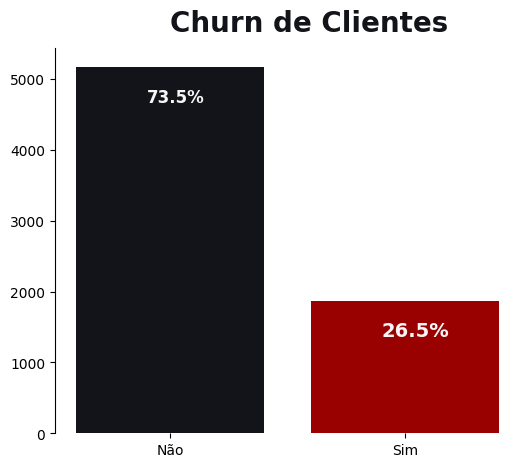

In [ ]:
import matplotlib.pyplot as plt

def plotar_grafico_barras(x, y, bar_colors, titulo, prop_nao_churn, prop_churn):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.bar(x, y, color=bar_colors)

    # Título
    ax.text(0, max(y) + 500, titulo, fontsize=20, color='#13141a', fontweight='bold')

    # Proporções
    ax.text(-0.10, y[0] - 500, prop_nao_churn, fontsize=12, color="#f6f6f6", fontweight='bold')
    ax.text(0.9, y[1] - 500, prop_churn, fontsize=14, color="#f6f6f6", fontweight='bold')

    # Configurar bordas
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

# Exemplo de uso da função
x = ['Não', 'Sim']
y = df_clean.Churn.value_counts()
bar_colors = ['#13141a', '#990100']
titulo = 'Churn de Clientes'
prop_nao_churn = '73.5%'
prop_churn = '26.5%'

plotar_grafico_barras(x, y, bar_colors, titulo, prop_nao_churn, prop_churn)

Abaixo fizemos uma análise de densidade das variáveis de TotalCharges, MonthlyCharges e tenure, para verificar a distribuição de cada uma delas relacionada ao churn prediction.

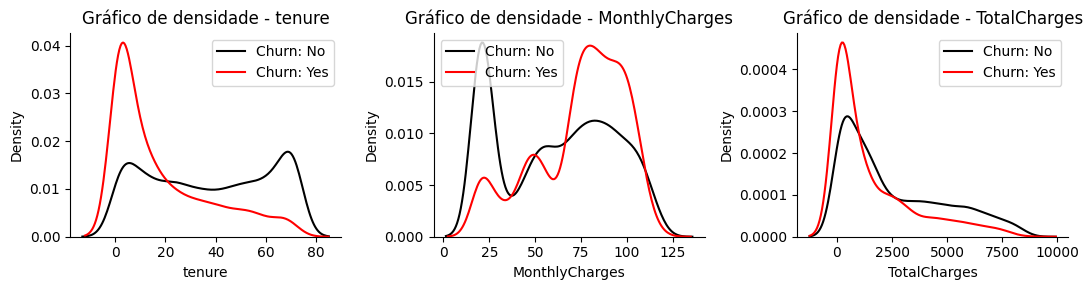

In [ ]:
# Criando gráfico de densidade
def kdeplot(df, feature, hist, kde, ax):
    sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde,
                 label='Churn: No', color='black', ax=ax)
    sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde,
                 label='Churn: Yes', color='red', ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.set_title("Gráfico de densidade - {}".format(feature))

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,3))

# Plotando cada gráfico
kdeplot(df_clean, 'tenure', hist=False, kde=True, ax=axes[0])
kdeplot(df_clean, 'MonthlyCharges', hist=False, kde=True, ax=axes[1])
kdeplot(df_clean, 'TotalCharges', hist=False, kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

A análise dos gráficos indica que:

- O churn tende a ser mais alto entre clientes que estão na fase inicial do plano, principalmente entre 10 a 20 meses, e diminui com o tempo de contrato.
- Clientes que enfrentam cobranças mensais mais elevadas mostram uma maior tendência de cancelar seus serviços.
- O total de cobranças mostra padrões semelhantes tanto para os clientes que permanecem quanto para os que saem.

In [ ]:
# Visualizando a quantidade de cada gênero
df_clean.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

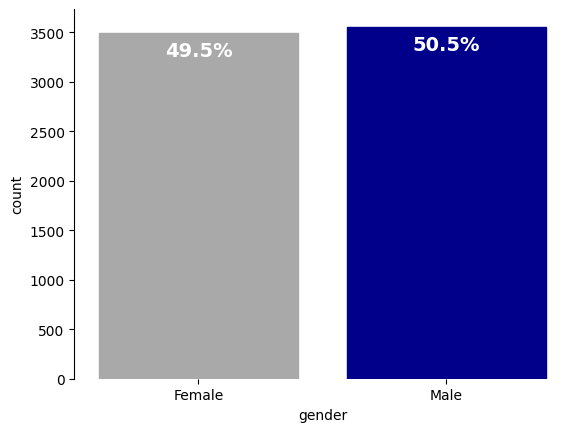

In [ ]:
# Criação do subplot
fig, ax = plt.subplots()

# Usando seaborn para criar o gráfico de contagem
ax = sns.countplot(data=df, x='gender')

# Definindo cores para cada barra
bar_colors = ['darkblue' if x == 'Male' else 'darkgray' for x in df['gender'].unique()]
for bar, color in zip(ax.containers[0], bar_colors):
    bar.set_color(color)

# Removendo spines desnecessários
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calcular as porcentagens e adicionar no topo das barras
total = len(df['gender'])
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.text(bar.get_x() + bar.get_width() / 2, height - (0.05 * height), percentage, ha='center', va='center', color='white', fontweight='bold', fontsize=14)

plt.show()

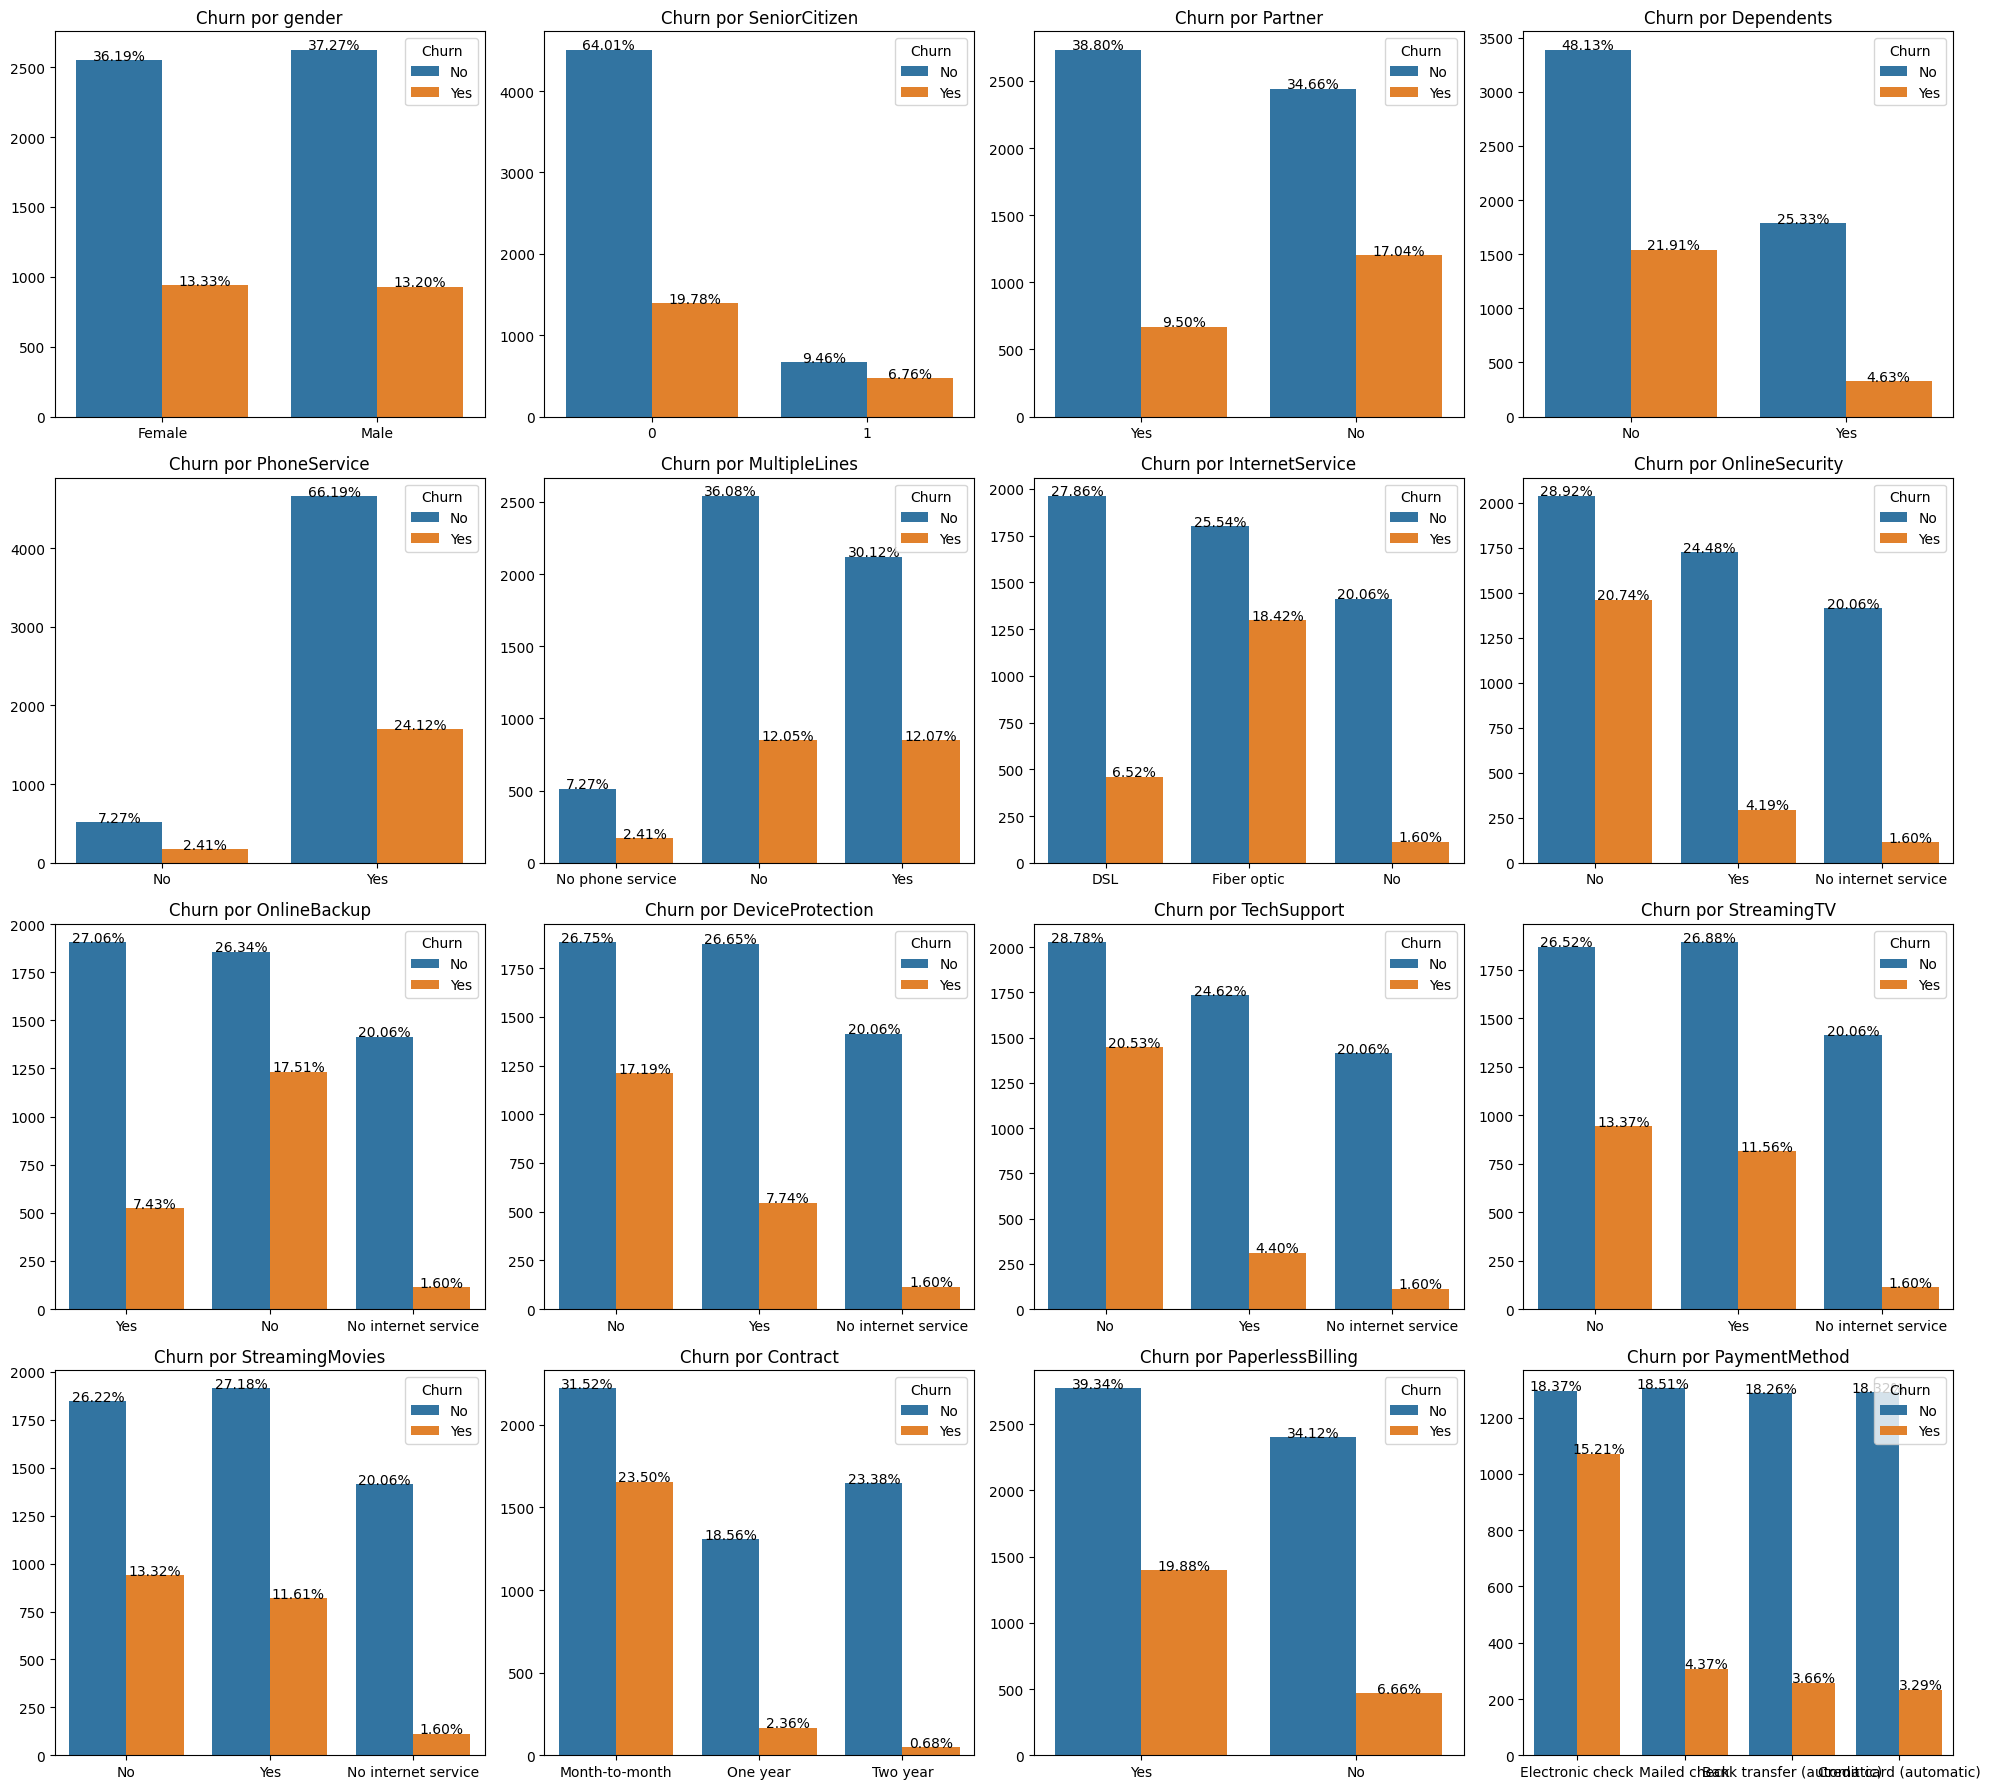

In [ ]:
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
              'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Função para adicionar a porcentagem em cada barra do gráfico
def add_percentage(ax, total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:1.2f}%'.format(100 * height / total), ha="center")

# Criando gráficos com porcentagens
plt.figure(figsize=(20, 18))
for i, category in enumerate(categories, 1):
    ax = plt.subplot(4, 4, i)
    countplot = sns.countplot(x=category, hue='Churn', data=df_clean)
    add_percentage(ax, len(df_clean))
    plt.title(f'Churn por {category}')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

Analisando cada gráfico gerado, focando nas tendências e padrões em relação ao churn:

1. **Churn por Gênero**:
   - Não parece haver uma diferença significativa na taxa de churn entre gêneros. Isso indica que o gênero não é um fator determinante para o churn.

2. **Churn e Cidadania Sênior (SeniorCitizen)**:
   - Uma maior proporção de cidadãos idosos parece deixar a empresa em comparação com os não idosos, sugerindo que os idosos podem ter necessidades ou expectativas diferentes que não estão sendo atendidas.

3. **Churn e Parceiro (Partner)**:
   - Clientes sem parceiro têm uma taxa de churn maior. Isso pode indicar que clientes com parceiros tendem a ter estabilidade ou necessidades diferentes que influenciam na decisão de permanecer com a empresa.

4. **Churn e Dependentes**:
   - Similarmente, clientes sem dependentes apresentam uma taxa de churn maior. Ter dependentes pode estar associado a uma maior necessidade de estabilidade nos serviços.

5. **Churn e PhoneService**:
   - A presença ou ausência de serviço telefônico não mostra uma diferença substancial no churn.

6. **Churn e MultipleLines**:
   - Não há diferença significativa no churn entre os que têm várias linhas e os que não têm.

7. **Churn e InternetService**:
   - Clientes com serviço de fibra óptica têm uma taxa de churn significativamente mais alta. Isso pode indicar problemas com este serviço ou uma maior competitividade no mercado de fibra óptica.

8. **Churn e Serviços Online (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)**:
   - Em todas essas categorias, clientes sem esses serviços têm uma taxa de churn mais alta, indicando que a disponibilidade desses serviços pode ser um fator importante na retenção de clientes.

9. **Churn e Streaming (StreamingTV, StreamingMovies)**:
   - Não há uma diferença marcante na taxa de churn entre clientes que usam ou não esses serviços.

10. **Churn e Tipo de Contrato (Contract)**:
    - Clientes com contratos mensais (Month-to-month) têm uma taxa de churn muito mais alta em comparação com contratos anuais ou de dois anos. Isso sugere que contratos mais longos podem estar associados a uma maior lealdade ou satisfação do cliente.

11. **Churn e PaperlessBilling**:
    - Clientes com faturamento sem papel (PaperlessBilling) mostram uma taxa de churn mais alta, o que pode ser uma coincidência ou indicar uma correlação com outros fatores como conforto tecnológico ou tipo de serviço.

12. **Churn e Método de Pagamento (PaymentMethod)**:
    - Métodos de pagamento eletrônicos, como cheques eletrônicos, estão associados a uma maior taxa de churn. Isso pode refletir um segmento de cliente mais propenso a mudanças ou mais confortável com mudanças tecnológicas.

**Visão Geral**:
- Fatores como tipo de contrato, serviços adicionais (como segurança online e suporte técnico), e características demográficas (como ser idoso ou ter dependentes) mostram uma correlação mais forte com o churn.
- Serviços específicos, como fibra óptica, e métodos de pagamento eletrônicos também parecem influenciar significativamente as taxas de churn.
- Fatores como gênero ou a presença de um serviço telefônico básico não mostram uma influência significativa no churn.

Esses insights podem ser úteis para a empresa ao desenvolver estratégias de retenção de clientes, focando em áreas onde o churn é mais prevalente.

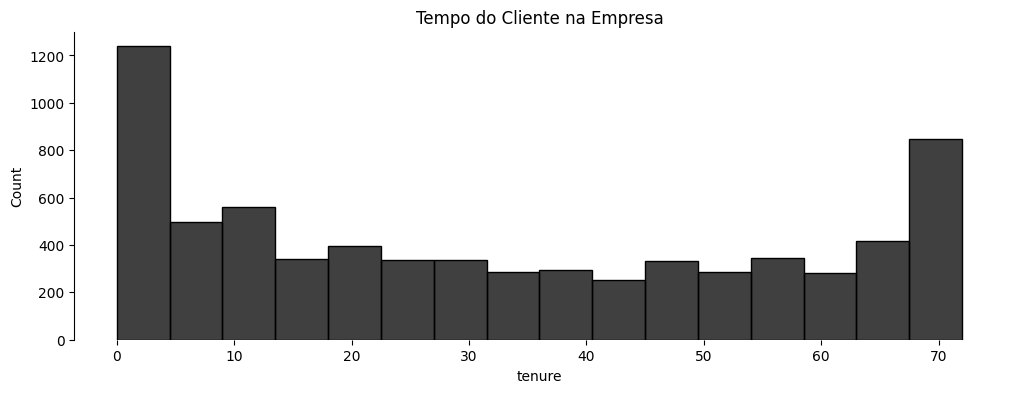

In [ ]:
fig, ax = plt.subplots( figsize=(12, 4))

# Código para o primeiro subplot
sns.histplot(df_clean['tenure'], ax=ax, color = 'black')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Tempo do Cliente na Empresa')


plt.show()

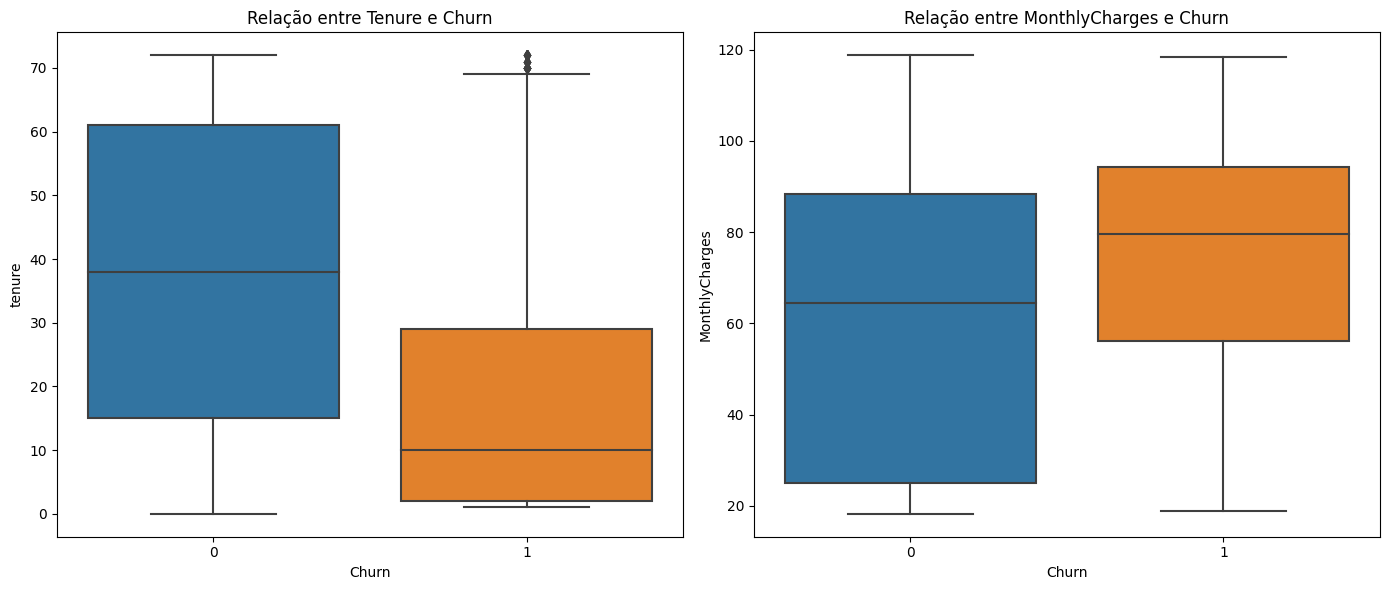

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199037
Churn             1.000000
Name: Churn, dtype: float64

In [ ]:
# Análise de Relações entre Variáveis: Tenure, MonthlyCharges e TotalCharges

# Convertendo a coluna 'Churn' para numérico para facilitar a análise
df_clean['Churn'] = df_clean['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Relação entre Tenure e Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df_clean)
plt.title('Relação entre Tenure e Churn')

# Relação entre MonthlyCharges e Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean)
plt.title('Relação entre MonthlyCharges e Churn')

plt.tight_layout()
plt.show()

# Calculando a correlação entre as variáveis numéricas e o Churn
correlation = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
correlation['Churn']

A análise das variáveis numéricas em relação ao churn mostra:

- **Tenure e Churn**: Clientes com menor tempo de permanência (tenure) apresentam mais churn. Existe uma correlação negativa significativa, indicando que quanto mais tempo um cliente fica com a empresa, menor é a chance de cancelamento.
- **MonthlyCharges e Churn**: Clientes com cobranças mensais mais elevadas são mais propensos ao churn, refletido por uma correlação positiva moderada.
- **TotalCharges e Churn**: Apesar da correlação negativa, clientes com maiores cobranças totais tendem a ter menor churn, provavelmente devido ao aumento do tempo de permanência com a empresa.

Esses padrões oferecem insights para estratégias de retenção, como incentivos para clientes novos e ajustes nos planos de preços para aqueles com altas cobranças mensais.

Vamos prosseguir com a Análise de Segmentos de Clientes. Nesta análise, vamos agrupar os clientes com base em características semelhantes e analisar o comportamento de diferentes segmentos, como idosos, clientes com ou sem dependentes, entre outros. Isso pode nos ajudar a entender melhor as necessidades e os padrões de comportamento de diferentes grupos de clientes.

Focaremos em alguns segmentos chave, como:

1. **Idade (SeniorCitizen)**: Comparar clientes idosos e não idosos.
2. **Família (Partner e Dependents)**: Analisar clientes com e sem parceiros ou dependentes.
3. **Serviços Utilizados**: Comparar clientes com base nos serviços que utilizam, como InternetService, OnlineSecurity, etc.
4. **Tipo de Contrato (Contract)**: Comparar clientes com diferentes tipos de contratos.
5. **Método de Pagamento (PaymentMethod)**: Analisar as diferenças entre clientes com diferentes métodos de pagamento.

Vamos iniciar a análise de segmentos de clientes, começando com a comparação de clientes idosos e não idosos

In [ ]:
# Verificando outliers no dataset

def count_outliers(column):
    """Count the number of outliers in a column using the IQR method."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Selecionando colunas númericas
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64'])

# Contando outliers para cada coluna numérica
outliers_count = numeric_cols.apply(count_outliers)

# Convertendo para um DataFrame
outliers_count_df = outliers_count.reset_index()
outliers_count_df.columns = ['Variavel', 'Quantidade de Outliers']
outliers_count_df


,Variavel,Quantidade de Outliers
0,SeniorCitizen,1142
1,tenure,0
2,MonthlyCharges,0
3,TotalCharges,0
4,Churn,0


In [ ]:
# pré processar as variáveis
from sklearn.preprocessing import LabelEncoder
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
churn = df_proc[df_proc['Churn'] == 1]
valid = df_proc[df_proc['Churn'] == 0]

print('Casos de Churn:{}'.format(len(df_proc[df_proc['Churn'] == 1])))
print('Casos de não Churn:{}'.format(len(df_proc[df_proc['Churn'] == 0])))

Casos de Churn:1869
Casos de não Churn:5174


In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
undersampled_data = df_proc.copy()

x = undersampled_data.drop(columns= 'Churn')
y = undersampled_data['Churn']


# Ajustando o modelo de EditedNearestNeighbours
enn = EditedNearestNeighbours()
x, y= enn.fit_resample(x, y)

# Treinando
X_train, X_test, y_train, y_test = train_test_split(
    x, y, shuffle=True, stratify=y, random_state=0, test_size=0.2
)

y_train.value_counts(), y_test.value_counts()

(0    2420
 1    1495
 Name: Churn, dtype: int64,
 0    605
 1    374
 Name: Churn, dtype: int64)

In [ ]:
# Utilizando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['MonthlyCharges', 'TotalCharges']])
X_test[['MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['MonthlyCharges', 'TotalCharges']])
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3081,1,0,0,0,2,1,1,0.360239,0.011107,0,...,1,0,0,1,0,0,0,0,0,1
3384,1,0,0,0,4,1,0,0.599900,0.036289,0,...,1,0,0,1,0,0,0,0,1,0
2062,0,1,0,0,36,1,1,0.564524,0.307922,0,...,1,0,0,1,0,0,1,0,0,0
4374,0,0,1,0,44,1,1,0.775785,0.506702,0,...,0,0,1,1,0,0,0,0,1,0
372,1,0,1,0,60,1,0,0.058794,0.173406,0,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
# Instalando o scikit-plot
pip install scikit-plot -q

In [ ]:
# Instalando o catboost
pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


# Modelagem

**Objetivo:** Desenvolver modelos de machine learning para prever o churn.

**Modelos Testados:** Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost, Naive Bayes, AdaBoost, CatBoost, e um modelo empilhado (stacked).

**Ajuste de Hiperparâmetros e Feature Importance**:
Com o ajuste de hiperparâmetros, houve melhorias significativas no desempenho dos modelos. Três modelos específicos apresentaram melhorias aproximadas.Random Forest, Adaboost e um Modelo Empilhado, considerando as métricas de recall, precisão e AUC-ROC, podemos avaliar qual modelo é o mais adequado para este contexto específico. Realizamos também a análise das features mais importantes para os modelos que se sobressairam.

1. **Random Forest Otimizado**:
   - Precisão (Precision): 0.93 (classe 0), 0.80 (classe 1)
   - Recall: 0.86 (classe 0), 0.89 (classe 1)
   - AUC-ROC: 0.94

2. **Adaboost Otimizado**:
   - Precisão: 0.91 (classe 0), 0.83 (classe 1)
   - Recall: 0.90 (classe 0), 0.85 (classe 1)
   - AUC-ROC: 0.94

3. **Modelo Empilhado Otimizado**:
   - Precisão: 0.92 (classe 0), 0.82 (classe 1)
   - Recall: 0.88 (classe 0), 0.87 (classe 1)
   - AUC-ROC: 0.94

Para previsão de churn, é crucial identificar corretamente os clientes que provavelmente deixarão o serviço (classe 1). Portanto, o recall para a classe 1 é uma métrica importante, pois indica a proporção de verdadeiros positivos identificados corretamente pelo modelo. Além disso, a precisão para a classe 1 também é relevante, pois indica quão precisas são as previsões de churn. A AUC-ROC, que mede a capacidade do modelo de distinguir entre as classes, é igualmente importante.

Analisando as métricas:

- O **Random Forest Otimizado** tem um alto recall para a classe 1 (0.89), o que é benéfico para prever churn. Sua precisão para a classe 1 é a mais baixa entre os três modelos, mas ainda assim é considerável.

- O **Adaboost Otimizado** apresenta um equilíbrio ligeiramente melhor entre precisão e recall para a classe 1 em comparação com o Random Forest.

- O **Modelo Empilhado(Stacking) Otimizado** tem um desempenho comparável aos outros dois em termos de AUC-ROC e supera ligeiramente em recall para a classe 1, mas sua precisão para a classe 1 é ligeiramente inferior à do Adaboost.

Considerando a importância do recall na previsão de churn, o **Modelo Empilhado Otimizado** parece ser a escolha mais equilibrada, oferecendo um bom recall para a classe 1 com uma precisão e AUC-ROC comparáveis às dos outros modelos. Vamos agora avaliar, para garantir a escolha do melhor modelo.

Relatorio de Classificação do Modelo:Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       605
           1       0.78      0.86      0.82       374

    accuracy                           0.85       979
   macro avg       0.84      0.85      0.85       979
weighted avg       0.86      0.85      0.86       979

AUC-ROC: 0.93
Confusion matrix:


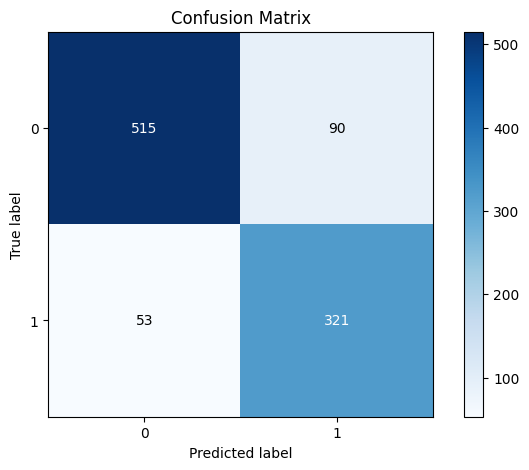

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, precision_recall_curve
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier


# Inicializando os modelos
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
naive_bayes = GaussianNB()
adaboost = AdaBoostClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42, )

# Dicionário para armazenar os resultados
model_results = {}

# Logistic Regression como baseline
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1]

threshold= 0.4
adj_lr = (y_pred_log_reg_prob >= threshold).astype(int)

model_results['Logistic Regression'] = {

    print('Relatorio de Classificação do Modelo:Logistic Regression'),
    print(classification_report(y_test, adj_lr)),

    print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_log_reg_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, adj_lr, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()

}

model_results['Logistic Regression']
plt.show()

Relatorio de Classificação do Modelo:Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       605
           1       0.75      0.77      0.76       374

    accuracy                           0.82       979
   macro avg       0.80      0.81      0.81       979
weighted avg       0.82      0.82      0.82       979

AUC-ROC: 0.81
Confusion matrix:


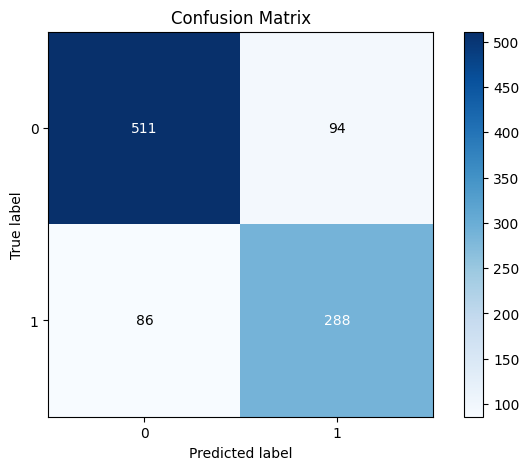

Relatorio de Classificação do Modelo:Random Forest
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       605
           1       0.85      0.79      0.82       374

    accuracy                           0.87       979
   macro avg       0.86      0.85      0.86       979
weighted avg       0.87      0.87      0.87       979

AUC-ROC: 0.94
Confusion matrix:


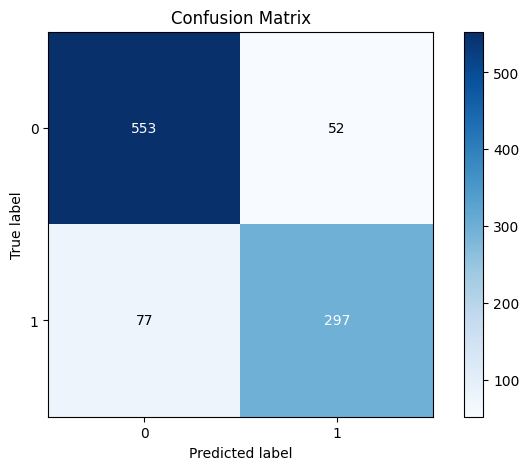

Relatorio de Classificação do Modelo:SVM
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       605
           1       0.83      0.76      0.80       374

    accuracy                           0.85       979
   macro avg       0.85      0.83      0.84       979
weighted avg       0.85      0.85      0.85       979

AUC-ROC: 0.92
Confusion matrix:


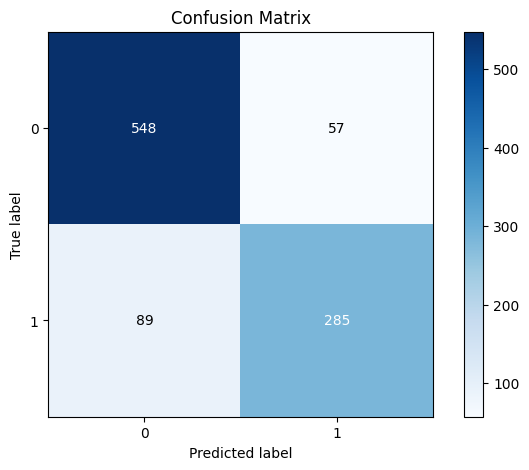

Relatorio de Classificação do Modelo:XGBoost
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       605
           1       0.83      0.80      0.81       374

    accuracy                           0.86       979
   macro avg       0.86      0.85      0.85       979
weighted avg       0.86      0.86      0.86       979

AUC-ROC: 0.93
Confusion matrix:


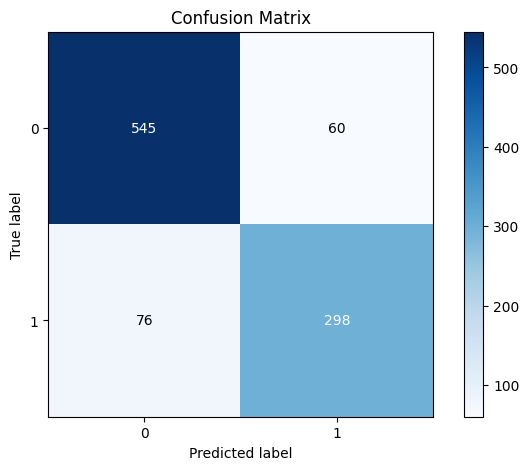

Relatório de Classificação do Modelo: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       605
           1       0.70      0.89      0.78       374

    accuracy                           0.81       979
   macro avg       0.81      0.83      0.81       979
weighted avg       0.83      0.81      0.81       979

AUC-ROC: 0.91
Matriz de Confusão:


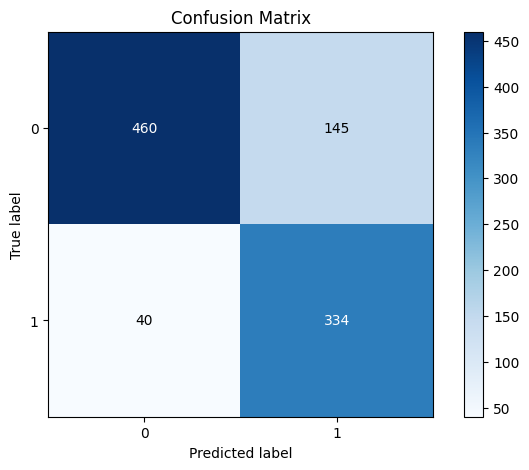

Relatório de Classificação do Modelo: AdaBoost
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       605
           1       0.82      0.83      0.83       374

    accuracy                           0.87       979
   macro avg       0.86      0.86      0.86       979
weighted avg       0.87      0.87      0.87       979

AUC-ROC: 0.94
Matriz de Confusão:


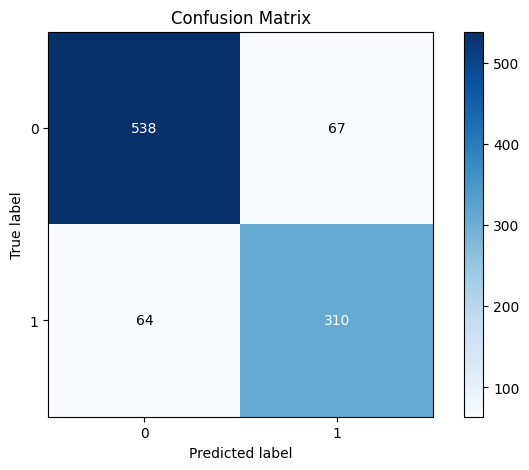

Relatório de Classificação do Modelo: CatBoost
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       605
           1       0.85      0.82      0.83       374

    accuracy                           0.88       979
   macro avg       0.87      0.86      0.87       979
weighted avg       0.87      0.88      0.87       979

AUC-ROC: 0.94
Matriz de Confusão:


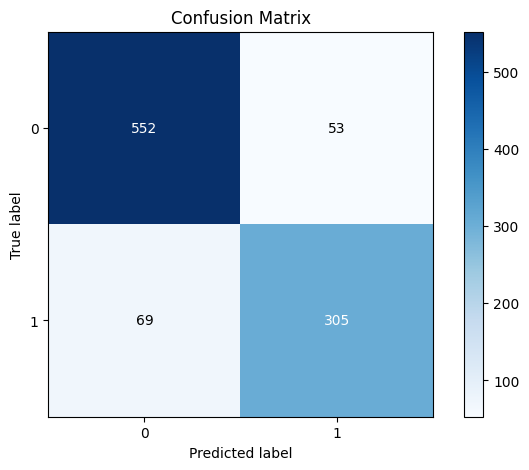

In [ ]:
# Treinando e avaliando cada modelo

# Decision Tree
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
y_pred_dtree_prob = dtree.predict_proba(X_test)[:,1]
model_results['Decision Tree'] = {
    print('Relatorio de Classificação do Modelo:Decision Tree'),
    print(classification_report(y_test, y_pred_dtree)),

    print('AUC-ROC:', round(roc_auc_score(y_test,y_pred_dtree_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtree, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()
}

# Random Forest
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_rand_forest_prob = rand_forest.predict_proba(X_test)[:,1]

model_results['Random Forest'] = {
    print('Relatorio de Classificação do Modelo:Random Forest'),
    print(classification_report(y_test, y_pred_rand_forest)),

    print('AUC-ROC:', round(roc_auc_score(y_test,y_pred_rand_forest_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, y_pred_rand_forest, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()
}

# SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)[:,1]
model_results['SVM'] = {
    print('Relatorio de Classificação do Modelo:SVM'),
    print(classification_report(y_test, y_pred_svm)),

    print('AUC-ROC:', round(roc_auc_score(y_test,y_pred_svm_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()
}

# XGBoost
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
y_pred_xgboost_prob = xgboost.predict_proba(X_test)[:,1]
model_results['XGBoost'] = {
    print('Relatorio de Classificação do Modelo:XGBoost'),
    print(classification_report(y_test, y_pred_xgboost)),

    print('AUC-ROC:', round(roc_auc_score(y_test,y_pred_xgboost_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgboost, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()
}

# Treinando e avaliando Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
y_pred_naive_bayes_prob = naive_bayes.predict_proba(X_test)[:, 1]

print('Relatório de Classificação do Modelo: Naive Bayes')
print(classification_report(y_test, y_pred_naive_bayes))
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_naive_bayes_prob), 2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_naive_bayes, figsize=(8, 5))
print('Matriz de Confusão:')
plt.show()

# Treinando e avaliando AdaBoost
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
y_pred_adaboost_prob = adaboost.predict_proba(X_test)[:, 1]

print('Relatório de Classificação do Modelo: AdaBoost')
print(classification_report(y_test, y_pred_adaboost))
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_adaboost_prob), 2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_adaboost, figsize=(8, 5))
print('Matriz de Confusão:')
plt.show()

# Treinando e avaliando o CatBoost
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
y_pred_catboost_prob = catboost.predict_proba(X_test)[:, 1]

print('Relatório de Classificação do Modelo: CatBoost')
print(classification_report(y_test, y_pred_catboost))
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_catboost_prob), 2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_catboost, figsize=(8, 5))
print('Matriz de Confusão:')
plt.show()

Relatório de Classificação do Modelo: Random Forest Otimizado
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       605
           1       0.80      0.89      0.84       374

    accuracy                           0.87       979
   macro avg       0.86      0.87      0.87       979
weighted avg       0.88      0.87      0.87       979

AUC-ROC: 0.94
AUC-PR: 0.92


Text(0.5, 1.0, 'Matriz de Confusão do Modelo: Random Forest Otimizado')

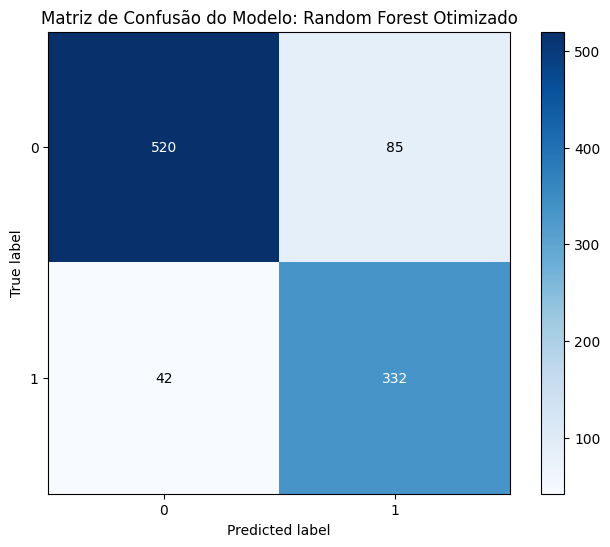

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt


# Inicializando e configurando a busca de hiperparâmetros
rand_forest= RandomForestClassifier(
    n_estimators= 1500,
    max_depth=20,
    criterion ='gini',
    min_samples_split= 7,
    min_samples_leaf = 1,
    max_features = 'log2',
    random_state=42,
    max_leaf_nodes=None,
    max_samples=360,
    verbose=0,
    n_jobs=None,
    bootstrap=True
)

rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_rand_forest_prob = rand_forest.predict_proba(X_test)[:,1]

threshold = 0.4
rf_adjusted = (y_pred_rand_forest_prob >= threshold).astype(int)

# Relatório de classificação e AUC-ROC
print('Relatório de Classificação do Modelo: Random Forest Otimizado')
print(classification_report(y_test, rf_adjusted))
print(f'AUC-ROC: {round(roc_auc_score(y_test,y_pred_rand_forest_prob), 2)}')

# AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_rand_forest_prob)
auc_pr = auc(recall, precision)
print(f'AUC-PR: {round(auc_pr, 2)}')

# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, rf_adjusted, figsize=(8, 6))
plt.title('Matriz de Confusão do Modelo: Random Forest Otimizado')


Relatorio de Classificação do Modelo:XGBoost
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       605
           1       0.80      0.83      0.81       374

    accuracy                           0.85       979
   macro avg       0.85      0.85      0.85       979
weighted avg       0.86      0.85      0.86       979

AUC-ROC: 0.93
Confusion matrix:


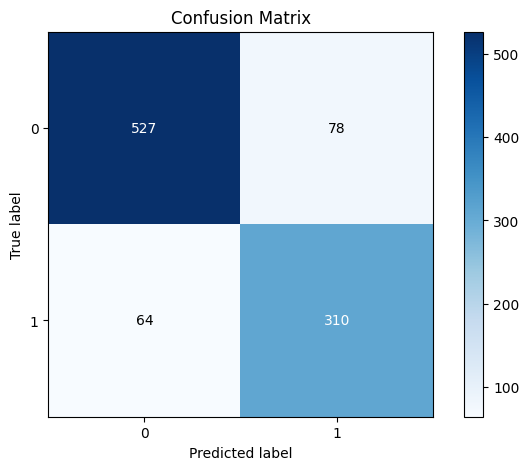

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, auc, precision_recall_curve

xgboost = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=25,
    n_estimators=500,
    scale_pos_weight=109,
    verbosity=0
)

xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
y_pred_xgboost_prob = xgboost.predict_proba(X_test)[:,1]


threshold = 0.8
xgb_adjusted = (y_pred_xgboost_prob >= threshold).astype(int)

# Calcule a curva precision-recall e a AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgboost_prob)
auc_pr = auc(recall, precision)



model_results['XGBoost'] = {
    print('Relatorio de Classificação do Modelo:XGBoost'),
    print(classification_report(y_test, xgb_adjusted)),

    print('AUC-ROC:', round(roc_auc_score(y_test,y_pred_xgboost_prob),2)),

    skplt.metrics.plot_confusion_matrix(y_test, xgb_adjusted, figsize = (8,5)),
    print('Confusion matrix:'),

    plt.show()
}

Relatório de Classificação do Modelo:Adaboost Otimizado
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       605
           1       0.83      0.85      0.84       374

    accuracy                           0.88       979
   macro avg       0.87      0.87      0.87       979
weighted avg       0.88      0.88      0.88       979

AUC-ROC: 0.94
AUC-PR: 0.92


Text(0.5, 1.0, 'Matriz de Confusão do Modelo: Adaboost Otimizado')

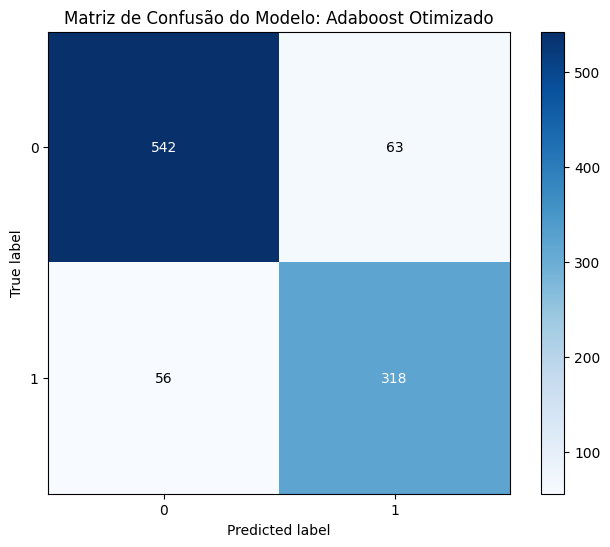

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt

estimator = DecisionTreeClassifier(max_depth=5)

# Inicializando e configurando a busca de hiperparâmetros
adaboost = AdaBoostClassifier(
    random_state=42,
    n_estimators=1000,
    learning_rate = 0.6,
    algorithm = 'SAMME.R',
)


# Treinando e avaliando AdaBoost
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
y_pred_adaboost_prob = adaboost.predict_proba(X_test)[:, 1]


# Relatório de classificação e AUC-ROC
print('Relatório de Classificação do Modelo:Adaboost Otimizado')
print(classification_report(y_test, y_pred_adaboost))
print(f'AUC-ROC: {round(roc_auc_score(y_test, y_pred_adaboost_prob), 2)}')

# AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_adaboost_prob)
auc_pr = auc(recall, precision)
print(f'AUC-PR: {round(auc_pr, 2)}')

# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_adaboost, figsize=(8, 6))
plt.title('Matriz de Confusão do Modelo: Adaboost Otimizado')

Relatório de Classificação do Modelo: CatBoost
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       605
           1       0.85      0.83      0.84       374

    accuracy                           0.88       979
   macro avg       0.87      0.87      0.87       979
weighted avg       0.88      0.88      0.88       979

AUC-ROC: 0.94
Matriz de Confusão:


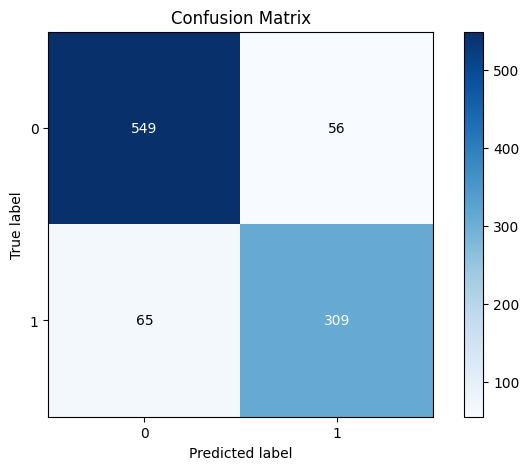

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt


# Inicializando e configurando a busca de hiperparâmetros
catboost = CatBoostClassifier(
    verbose=0,
    random_state=42,
    iterations= 700
)

# Treinando e avaliando o CatBoost
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
y_pred_catboost_prob = catboost.predict_proba(X_test)[:, 1]


print('Relatório de Classificação do Modelo: CatBoost')
print(classification_report(y_test, y_pred_catboost))
print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_catboost_prob), 2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_catboost, figsize=(8, 5))
print('Matriz de Confusão:')
plt.show()

In [ ]:
# Stacking dos modelos

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Definindo os modelos base
base_learners = [
    ('dtree', DecisionTreeClassifier(
    random_state=42,
    max_depth=17,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    splitter='best',
    criterion='entropy')),
    ('rand_forest', RandomForestClassifier(
    n_estimators= 1500,
    max_depth=20,
    criterion ='gini',
    min_samples_split= 7,
    min_samples_leaf = 1,
    max_features = 'log2',
    random_state=42,
    max_leaf_nodes=None,
    max_samples=360,
    verbose=0,
    n_jobs=None,
    bootstrap=True)),
    ('log_reg', LogisticRegression(max_iter=500, random_state=42)),
]

# Definindo o meta-modelo
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Treinando o modelo
stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=17,
                                                       max_features='log2',
                                                       min_samples_split=10,
                                                       random_state=42)),
                               ('rand_forest',
                                RandomForestClassifier(max_depth=20,
                                                       max_features='log2',
                                                       max_samples=360,
                                                       min_samples_split=7,
                                                       n_estimators=1500,
                                                       random_state=42)),
                               ('log_reg',
                                LogisticRegression(max_iter=500,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

Acurácia do Modelo Empilhado: 0.8784473953013279
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       605
           1       0.82      0.87      0.85       374

    accuracy                           0.88       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.88      0.88       979

AUC-ROC: 0.94
Matriz de Confusão:


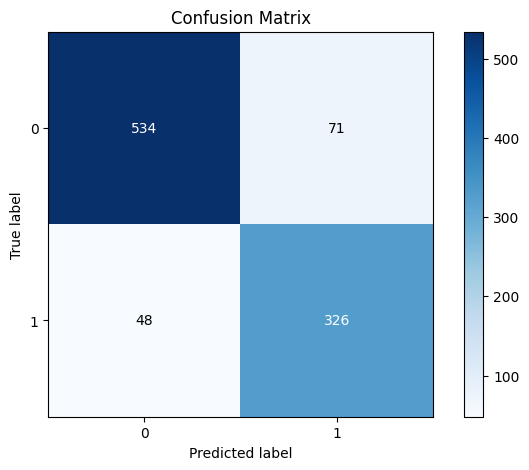

In [ ]:
# Passo 1: Treinando o modelo empilhado
stacked_model.fit(X_train, y_train)

# Passo 2: Avaliando o modelo
from sklearn.metrics import accuracy_score, classification_report

# Fazer previsões no conjunto de teste
y_pred = stacked_model.predict(X_test)
y_pred_proba = stacked_model.predict_proba(X_test)[:,1]

threshold = 0.4
adj_stacking = (y_pred_proba >= threshold).astype(int)

# Calcular a precisão
accuracy = accuracy_score(y_test, adj_stacking)
print(f"Acurácia do Modelo Empilhado: {accuracy}")

# Gerar o relatório de classificação
print(classification_report(y_test, adj_stacking))

print('AUC-ROC:', round(roc_auc_score(y_test, y_pred_proba), 2))
skplt.metrics.plot_confusion_matrix(y_test, adj_stacking, figsize=(8, 5))
print('Matriz de Confusão:')
plt.show()


In [ ]:
# Checando as Features Importance
# Ordenando-as
for score, name in sorted(zip(rand_forest.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of tenure : 14.866548104626935 %
Feature importance of Contract_Month-to-month : 12.115525364062181 %
Feature importance of TotalCharges : 10.88478068933746 %
Feature importance of MonthlyCharges : 7.087471905488156 %
Feature importance of OnlineSecurity_No : 5.768976412306211 %
Feature importance of TechSupport_No : 4.9747723597931826 %
Feature importance of InternetService_Fiber optic : 4.7629820387515664 %
Feature importance of Contract_Two year : 4.700057460898327 %
Feature importance of PaymentMethod_Electronic check : 3.1361019391313403 %
Feature importance of OnlineBackup_No : 2.2808737748911576 %
Feature importance of DeviceProtection_No : 1.979347024699904 %
Feature importance of InternetService_DSL : 1.6672688693856401 %
Feature importance of Contract_One year : 1.6663467420733384 %
Feature importance of OnlineSecurity_Yes : 1.5804984533268829 %
Feature importance of TechSupport_Yes : 1.2665789822129139 %
Feature importance of PaperlessBilling : 1.156659456

In [ ]:
# Checando as Features Importance
# Ordenando-as
for score, name in sorted(zip(adaboost.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of TotalCharges : 56.8 %
Feature importance of MonthlyCharges : 26.5 %
Feature importance of tenure : 12.2 %
Feature importance of Contract_Month-to-month : 0.6 %
Feature importance of OnlineSecurity_Yes : 0.4 %
Feature importance of MultipleLines_No : 0.4 %
Feature importance of TechSupport_Yes : 0.3 %
Feature importance of SeniorCitizen : 0.3 %
Feature importance of Partner : 0.3 %
Feature importance of PaperlessBilling : 0.3 %
Feature importance of Dependents : 0.3 %
Feature importance of TechSupport_No : 0.2 %
Feature importance of StreamingTV_Yes : 0.2 %
Feature importance of Contract_Two year : 0.2 %
Feature importance of Contract_One year : 0.2 %
Feature importance of gender : 0.1 %
Feature importance of StreamingMovies_Yes : 0.1 %
Feature importance of PaymentMethod_Mailed check : 0.1 %
Feature importance of PaymentMethod_Electronic check : 0.1 %
Feature importance of OnlineSecurity_No : 0.1 %
Feature importance of OnlineBackup_No internet service : 0.1 %
Fea

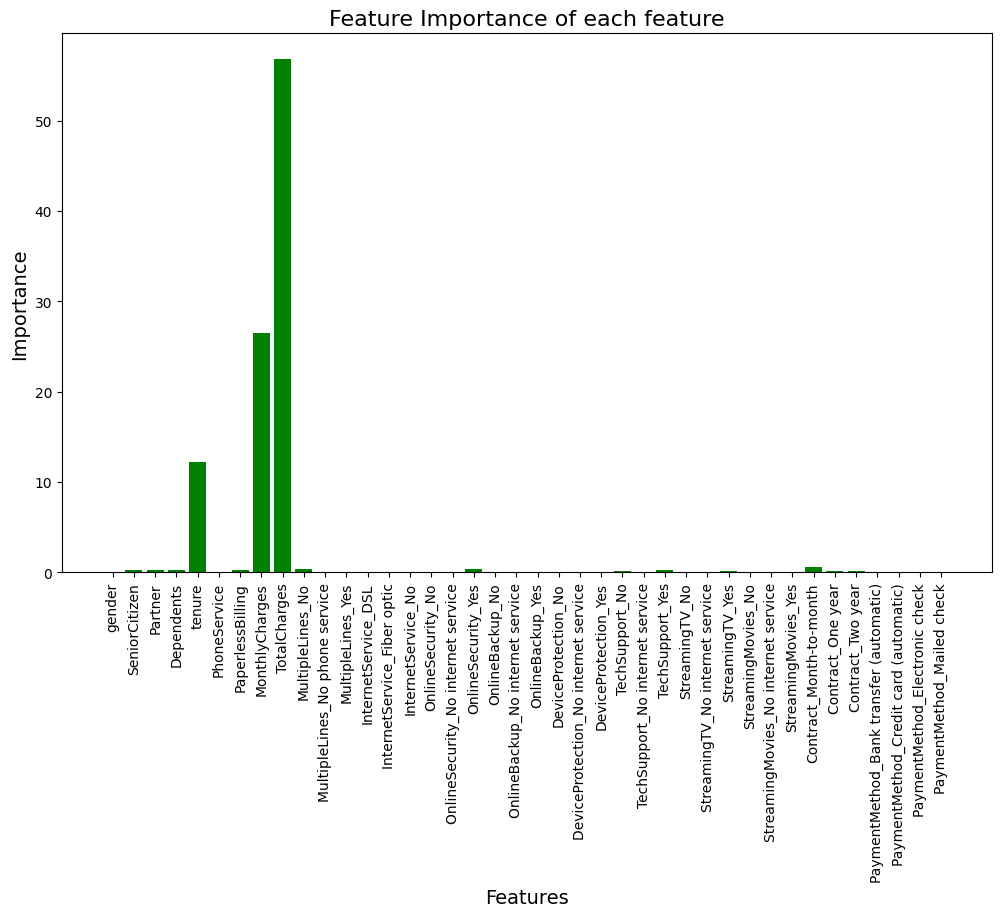

In [ ]:
# Plotando a feature importance de cada feature
plt.figure(figsize=(12,7))
plt.bar(X_train.columns,adaboost.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each feature', fontsize=16)
plt.show()

# Avaliaçao

### Validação Cruzada

A validação cruzada é uma técnica usada para avaliar a capacidade de generalização de um modelo preditivo, isto é, sua capacidade de se adaptar a novos dados, fora da amostra de treino. Ela é essencial para **Avaliar a Estabilidade do Modelo**, **Prevenir o Overfitting**, e **Selecionar Modelo mais adequado.**

Com base nos resultados da validação cruzada:

- **Stacked Model:** Recall médio de 0.80 com um desvio padrão de 0.0223.
- **Random Forest:** Recall médio de 0.7946 com um desvio padrão de 0.0197.
- **AdaBoost:** Recall médio de 0.8067 com um desvio padrão de 0.0182.


### Conclusões da Modelagem

O **AdaBoost** teve o maior recall médio com o menor desvio padrão, o que indica não apenas que ele é ligeiramente melhor em identificar os verdadeiros positivos (clientes que dão churn), mas também que seu desempenho é consistentemente bom em diferentes subconjuntos do dataset. A consistência é essencial para garantir que o modelo seja confiável quando implementado em um ambiente de produção, onde ele estará sujeito a variações naturais nos dados de entrada.

Portanto, com base nos dados de validação cruzada e considerando a importância do recall para a previsão de churn, o **modelo AdaBoost otimizado** será o escolhido.


In [ ]:
from sklearn.model_selection import cross_val_score

# Stacking dos modelos
# Definindo o meta-modelo
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

cv_scores = cross_val_score(stacked_model, X_train, y_train ,cv=5, scoring='recall')
print('Recall medio:', np.mean(cv_scores))
print('Desvio Padrão:', np.std(cv_scores))

Recall medio: 0.8
Desvio Padrão: 0.02232551072679415


In [ ]:
from sklearn.model_selection import cross_val_score

# Stacking dos modelos
# Definindo o meta-modelo

# Inicializando e configurando a busca de hiperparâmetros
rand_forest= RandomForestClassifier(
    n_estimators= 1500,
    max_depth=20,
    criterion ='gini',
    min_samples_split= 7,
    min_samples_leaf = 1,
    max_features = 'log2',
    random_state=42,
    max_leaf_nodes=None,
    max_samples=360,
    verbose=0,
    n_jobs=None,
    bootstrap=True
)


cv_scores = cross_val_score(rand_forest, X_train, y_train ,cv=5, scoring='recall')
print('Recall medio:', np.mean(cv_scores))
print('Desvio Padrão:', np.std(cv_scores))

Recall medio: 0.7946488294314381
Desvio Padrão: 0.01968419929038415


In [ ]:
from sklearn.model_selection import cross_val_score

# Stacking dos modelos
# Definindo o meta-modelo

# Inicializando e configurando a busca de hiperparâmetros
adaboost = AdaBoostClassifier(
    random_state=42,
    n_estimators=1000,
    learning_rate = 0.6,
    algorithm = 'SAMME.R',
)



cv_scores = cross_val_score(adaboost, X_train, y_train ,cv=5, scoring='recall')
print('Recall medio:', np.mean(cv_scores))
print('Desvio Padrão:', np.std(cv_scores))

Recall medio: 0.8066889632107024
Desvio Padrão: 0.018245059126402473



## Impacto do Modelo AdaBoost na Prevenção de Churn

### Situação Antes do Modelo AdaBoost

- **Contexto**: Empresa de telecomunicações com 100.000 clientes.
- **Churn Anual**: 26,54% dos clientes, ou seja, cerca de 26.537 clientes.
- **Receita Perdida sem Modelo**: Com um churn de 26.537 clientes e considerando `R$ 1.000` de receita por cliente por ano, a perda é de `R$ 26,54` milhões anualmente.
- **Retenção sem Modelo**: Antes do AdaBoost, apenas 10% dos churns eram prevenidos, salvando R$ 2,654 milhões em receita.

### Situação Após Implementar o Modelo AdaBoost

- **Detecção de Churn**: O modelo AdaBoost identifica 60% dos clientes em risco, ou seja, cerca de 15.922 clientes.
- **Prevenção Efetiva de Churn**: Com estratégias de retenção, 80% desses churns são evitados, significando que 12.738 clientes permanecem.
- **Receita Salva com o Modelo**: Evitando o churn de 12.738 clientes, a empresa salva cerca de R$ 12,738 milhões em receita.

### Resultado

Com o modelo AdaBoost, a empresa passou de salvar `R$ 2,654` milhões para R$ 12,738 milhões em receita anual, mostrando um aumento significativo na prevenção de churn.

# Conclusão:

Com base na análise abrangente do conjunto de dados de churn de clientes de telecomunicações, chegamos às seguintes conclusões:

1. **Fatores Críticos de Churn**:
   - Identificamos que o tipo de contrato, serviços adicionais (como segurança online), e características demográficas (como idade e presença de família) são fatores críticos que influenciam a decisão de churn dos clientes.

2. **Segmentos de Alto Risco**:
   - Segmentos específicos, como clientes idosos, usuários de fibra óptica, e aqueles com contratos mensais, mostraram taxas de churn significativamente mais altas, indicando áreas que requerem atenção especial.

3. **Importância dos Serviços Adicionais**:
   - A disponibilidade de serviços adicionais como suporte técnico e segurança online demonstrou ser um fator importante na retenção de clientes, sugerindo que o investimento nessas áreas pode ser benéfico.

4. **Métodos de Pagamento e Churn**:
   - A escolha do método de pagamento parece influenciar a taxa de churn, com métodos como cheque eletrônico mostrando uma correlação com taxas mais altas de churn.

5. **Potencial para Estratégias Personalizadas**:
   - As análises indicam que estratégias personalizadas para diferentes segmentos de clientes podem ser eficazes na redução do churn, especialmente para aqueles identificados como de alto risco.

6. **Necessidade de Melhorias Contínuas**:
   - Há uma necessidade contínua de análise e adaptação, à medida que os padrões de churn podem mudar com o tempo devido a novas tendências de mercado, mudanças tecnológicas, ou mudanças nas expectativas dos clientes.

Em resumo, esta análise fornece insights valiosos que podem orientar a empresa na implementação de estratégias direcionadas para melhorar a satisfação do cliente, otimizar serviços e, em última análise, reduzir a taxa de churn. A continuidade na análise de dados e a adaptabilidade às novas tendências serão cruciais para manter a competitividade e a eficácia dessas estratégias.

### Recomendações estratégicas

Baseando-nos nas análises realizadas, aqui estão algumas recomendações estratégicas:

1. **Foco em Contratos de Longo Prazo**:
   - A análise mostrou que clientes com contratos mensais têm uma taxa de churn significativamente mais alta. A empresa pode desenvolver estratégias para incentivar os clientes a optarem por contratos mais longos, oferecendo descontos ou benefícios adicionais.

2. **Melhoria nos Serviços de Fibra Óptica**:
   - Observamos uma taxa de churn mais alta entre os usuários de serviços de fibra óptica. Isso sugere a necessidade de melhorar a qualidade deste serviço, talvez através de melhorias tecnológicas ou suporte ao cliente mais robusto.

3. **Apoio a Clientes Idosos**:
   - Clientes idosos mostraram uma maior probabilidade de churn. Poderiam ser desenvolvidas estratégias específicas para este segmento, como suporte técnico personalizado, planos mais acessíveis ou serviços adaptados às suas necessidades.

4. **Serviços Adicionais como Fatores de Retenção**:
   - Serviços como segurança online, backup online e suporte técnico mostraram ser fatores importantes na retenção de clientes. Promover e melhorar esses serviços adicionais pode ajudar a reduzir a taxa de churn.

5. **Revisão de Métodos de Pagamento**:
   - A análise indicou uma maior taxa de churn entre os clientes que usam cheque eletrônico. Pode ser benéfico revisar as opções de pagamento, oferecendo mais alternativas ou incentivos para métodos de pagamento que se correlacionam com menor churn.

6. **Estratégias Personalizadas para Segmentos com Alta Taxa de Churn**:
   - Desenvolver estratégias de marketing e suporte personalizadas para segmentos específicos que demonstraram altas taxas de churn, como aqueles sem parceiros ou dependentes.

7. **Análise Contínua e Ajuste de Estratégias**:
   - É crucial continuar analisando os dados de churn regularmente para identificar novas tendências ou mudanças nos padrões existentes, ajustando as estratégias conforme necessário.